# Exploring

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [41]:
hcc = pd.read_csv('https://raw.githubusercontent.com/wisamb/HCC-Survival/master/hcc-data.txt', header=None, na_values='?')

In [42]:
hcc.columns = ['Gender','Symptoms','Alcohol','Hepatitis B Surface Antigen','Hepatitis B e Antigen','Hepatitis B Core Antibody',
                  'Hepatitis C Virus Antibody','Cirrhosis', 'Endemic Countries','Smoking', 'Diabetes','Obesity', 'Hemochromatosis', 
                  'Arterial Hypertension', 'Chronic Renal Insufficiency', 'Human Immunodeficiency Virus', 'Nonalcoholic Steatohepatitis', 
                  'Esophageal Varices', 'Splenomegaly', 'Portal Hypertension','Portal Vein Thrombosis', 'Liver Metastasis', 'Radiological Hallmark', 
                  'Age at diagnosis', 'Grams of Alcohol per day', 'Packs of cigarets per year', 'Performance Status', 'Encefalopathy degree',
                  'Ascites degree', 'International Normalised Ratio','Alpha-Fetoprotein','Haemoglobin', 'Mean Corpuscular Volume', 'Leukocytes','Platelets',
                  'Albumin', 'Total Bilirubin', 'Alanine transaminase', 'Aspartate transaminase','Gamma glutamyl transferase','Alkaline phosphatase', 
                  'Total Proteins', 'Creatinine','Number of Nodules', 'Major dimension of nodule','Direct Bilirubin','Iron', 'Oxygen Saturation',
                  'Ferritin','Class']

categorical = ['Gender','Symptoms','Alcohol','Hepatitis B Surface Antigen','Hepatitis B e Antigen'
,'Hepatitis B Core Antibody','Hepatitis C Virus Antibody','Cirrhosis','Endemic Countries'
,'Smoking','Diabetes','Obesity','Hemochromatosis','Arterial Hypertension','Chronic Renal Insufficiency'
,'Human Immunodeficiency Virus','Nonalcoholic Steatohepatitis','Esophageal Varices'
,'Splenomegaly','Portal Hypertension','Portal Vein Thrombosis','Liver Metastasis'
,'Radiological Hallmark','Packs of cigarets per year','Performance Status'
,'Encefalopathy degree','Ascites degree','Class']

categorical = list([x.replace(' ', '_').strip() for x in categorical])

In [43]:
hcc.head()

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1


In [44]:
hcc.shape

(165, 50)

In [45]:
hcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          165 non-null    int64  
 1   Symptoms                        147 non-null    float64
 2   Alcohol                         165 non-null    int64  
 3   Hepatitis B Surface Antigen     148 non-null    float64
 4   Hepatitis B e Antigen           126 non-null    float64
 5   Hepatitis B Core Antibody       141 non-null    float64
 6   Hepatitis C Virus Antibody      156 non-null    float64
 7   Cirrhosis                       165 non-null    int64  
 8   Endemic Countries               126 non-null    float64
 9   Smoking                         124 non-null    float64
 10  Diabetes                        162 non-null    float64
 11  Obesity                         155 non-null    float64
 12  Hemochromatosis                 142 

In [46]:
hcc.describe()

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
count,165.000000,147.000000,165.000000,148.000000,126.000000,141.000000,156.000000,165.000000,126.000000,124.000000,...,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000,165.000000
mean,0.806061,0.639456,0.739394,0.108108,0.007937,0.269504,0.217949,0.903030,0.079365,0.508065,...,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647,0.618182
std,0.396586,0.481800,0.440302,0.311571,0.089087,0.445284,0.414182,0.296817,0.271387,0.501963,...,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454,0.487311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000,1.000000


## Is there any missing data?

In [7]:
columns = []
length = []
for i in hcc.columns:
    columns.append(i)
    length.append(len(hcc[hcc[i] == '?']))

In [8]:
coleng = {'columns':columns,'length':length}
coleng = pd.DataFrame(coleng)
coleng.head()

,columns,length
0,Gender,0
1,Symptoms,18
2,Alcohol,0
3,Hepatitis B Surface Antigen,17
4,Hepatitis B e Antigen,39


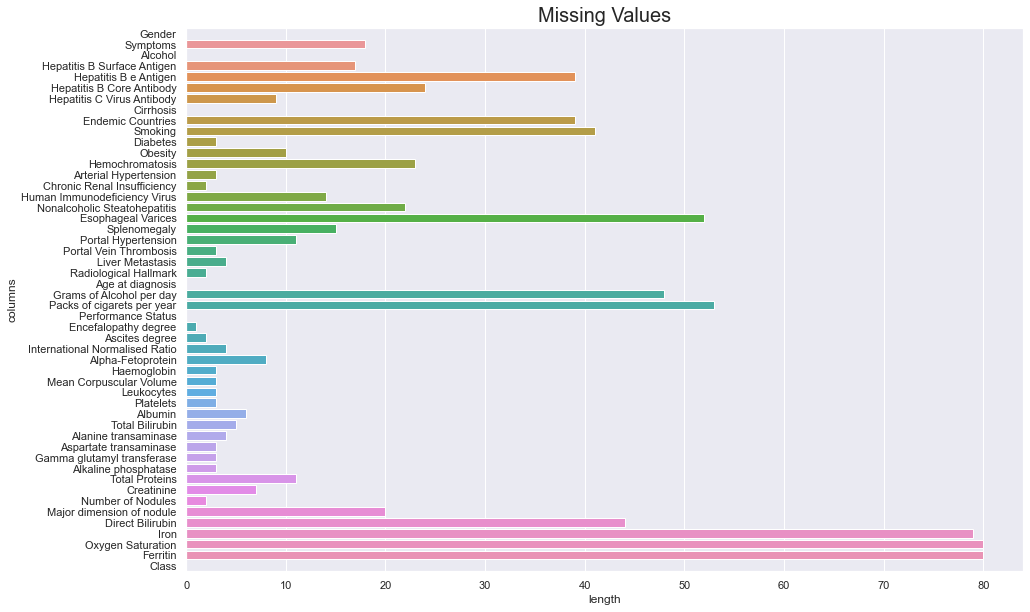

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(x="length", y="columns", data=coleng)
ax.set_title('Missing Values',fontsize=20)
plt.show()

In [10]:
data = []
for i in hcc.columns:
    a = hcc[i].replace(['?'],'NaN')
    data.append(a)

In [54]:
df = pd.DataFrame(data).T
df.head()

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0,0,0,1,1,NaN,NaN,...,NaN,NaN,NaN,1,1.8,NaN,NaN,NaN,NaN,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,NaN,NaN,NaN,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,NaN,59,15,22,1


## Using SimpleImputer and IterativeImputer to generate 4 datasets

In [26]:
# Mean
imputermean = SimpleImputer(missing_values= np.nan, strategy='mean')
imputermean = imputermean.fit(df.iloc[:])
mean = imputermean.transform(df.iloc[:])
mean = pd.DataFrame(mean,columns=df.columns)
mean.head()

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,...,150.000000,7.100000,0.700000,1.0,3.5,0.50,85.598837,37.028941,438.997647,1.0
1,0.0,0.639456,0.0,0.0,0.0,0.0,1.0,1.0,0.079365,0.508065,...,212.211605,8.961039,1.127089,1.0,1.8,1.93,85.598837,37.028941,438.997647,1.0
2,1.0,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,...,109.000000,7.000000,2.100000,5.0,13.0,0.10,28.000000,6.000000,16.000000,1.0
3,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,...,174.000000,8.100000,1.110000,2.0,15.7,0.20,85.598837,37.028941,438.997647,0.0
4,1.0,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,...,109.000000,6.900000,1.800000,1.0,9.0,1.93,59.000000,15.000000,22.000000,1.0


In [27]:
# Median
imputermedian = SimpleImputer(missing_values= np.nan, strategy='median')
imputermedian = imputermedian.fit(df.iloc[:])
median = imputermedian.transform(df.iloc[:])
median = pd.DataFrame(median,columns=df.columns)
median.head()

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,150.0,7.10,0.70,1.0,3.5,0.5,83.0,27.0,295.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,162.0,7.05,0.85,1.0,1.8,0.7,83.0,27.0,295.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,109.0,7.00,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,174.0,8.10,1.11,2.0,15.7,0.2,83.0,27.0,295.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,109.0,6.90,1.80,1.0,9.0,0.7,59.0,15.0,22.0,1.0


In [28]:
# Mode 
imputermode = SimpleImputer(missing_values= 'NaN',strategy='most_frequent')
imputermode = imputermode.fit(df.iloc[:])
mode = imputermode.transform(df.iloc[:])
mode = pd.DataFrame(mode,columns=df.columns)
mode.head()

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,94,25,48,1
1,0,1,0,0,0,0,1,1,0,1,...,109,7.3,0.7,1,1.8,0.3,94,25,48,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,94,25,48,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,0.3,59,15,22,1


In [29]:
# Iterative
imputer = IterativeImputer(random_state=0)
imputer.fit(df)
iterative = pd.DataFrame(imputer.transform(df),columns=df.columns)
iterative.head()

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,...,150.000000,7.100000,0.700000,1.0,3.5,0.500000,100.028535,45.276512,303.829006,1.0
1,0.0,0.605399,0.0,0.0,0.0,0.0,1.0,1.0,0.090765,0.367224,...,217.244968,8.981346,1.125009,1.0,1.8,0.932225,81.183713,33.085512,437.361997,1.0
2,1.0,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,...,109.000000,7.000000,2.100000,5.0,13.0,0.100000,28.000000,6.000000,16.000000,1.0
3,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,...,174.000000,8.100000,1.110000,2.0,15.7,0.200000,80.504114,35.539738,168.328814,0.0
4,1.0,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,...,109.000000,6.900000,1.800000,1.0,9.0,0.446900,59.000000,15.000000,22.000000,1.0


## Check correlation

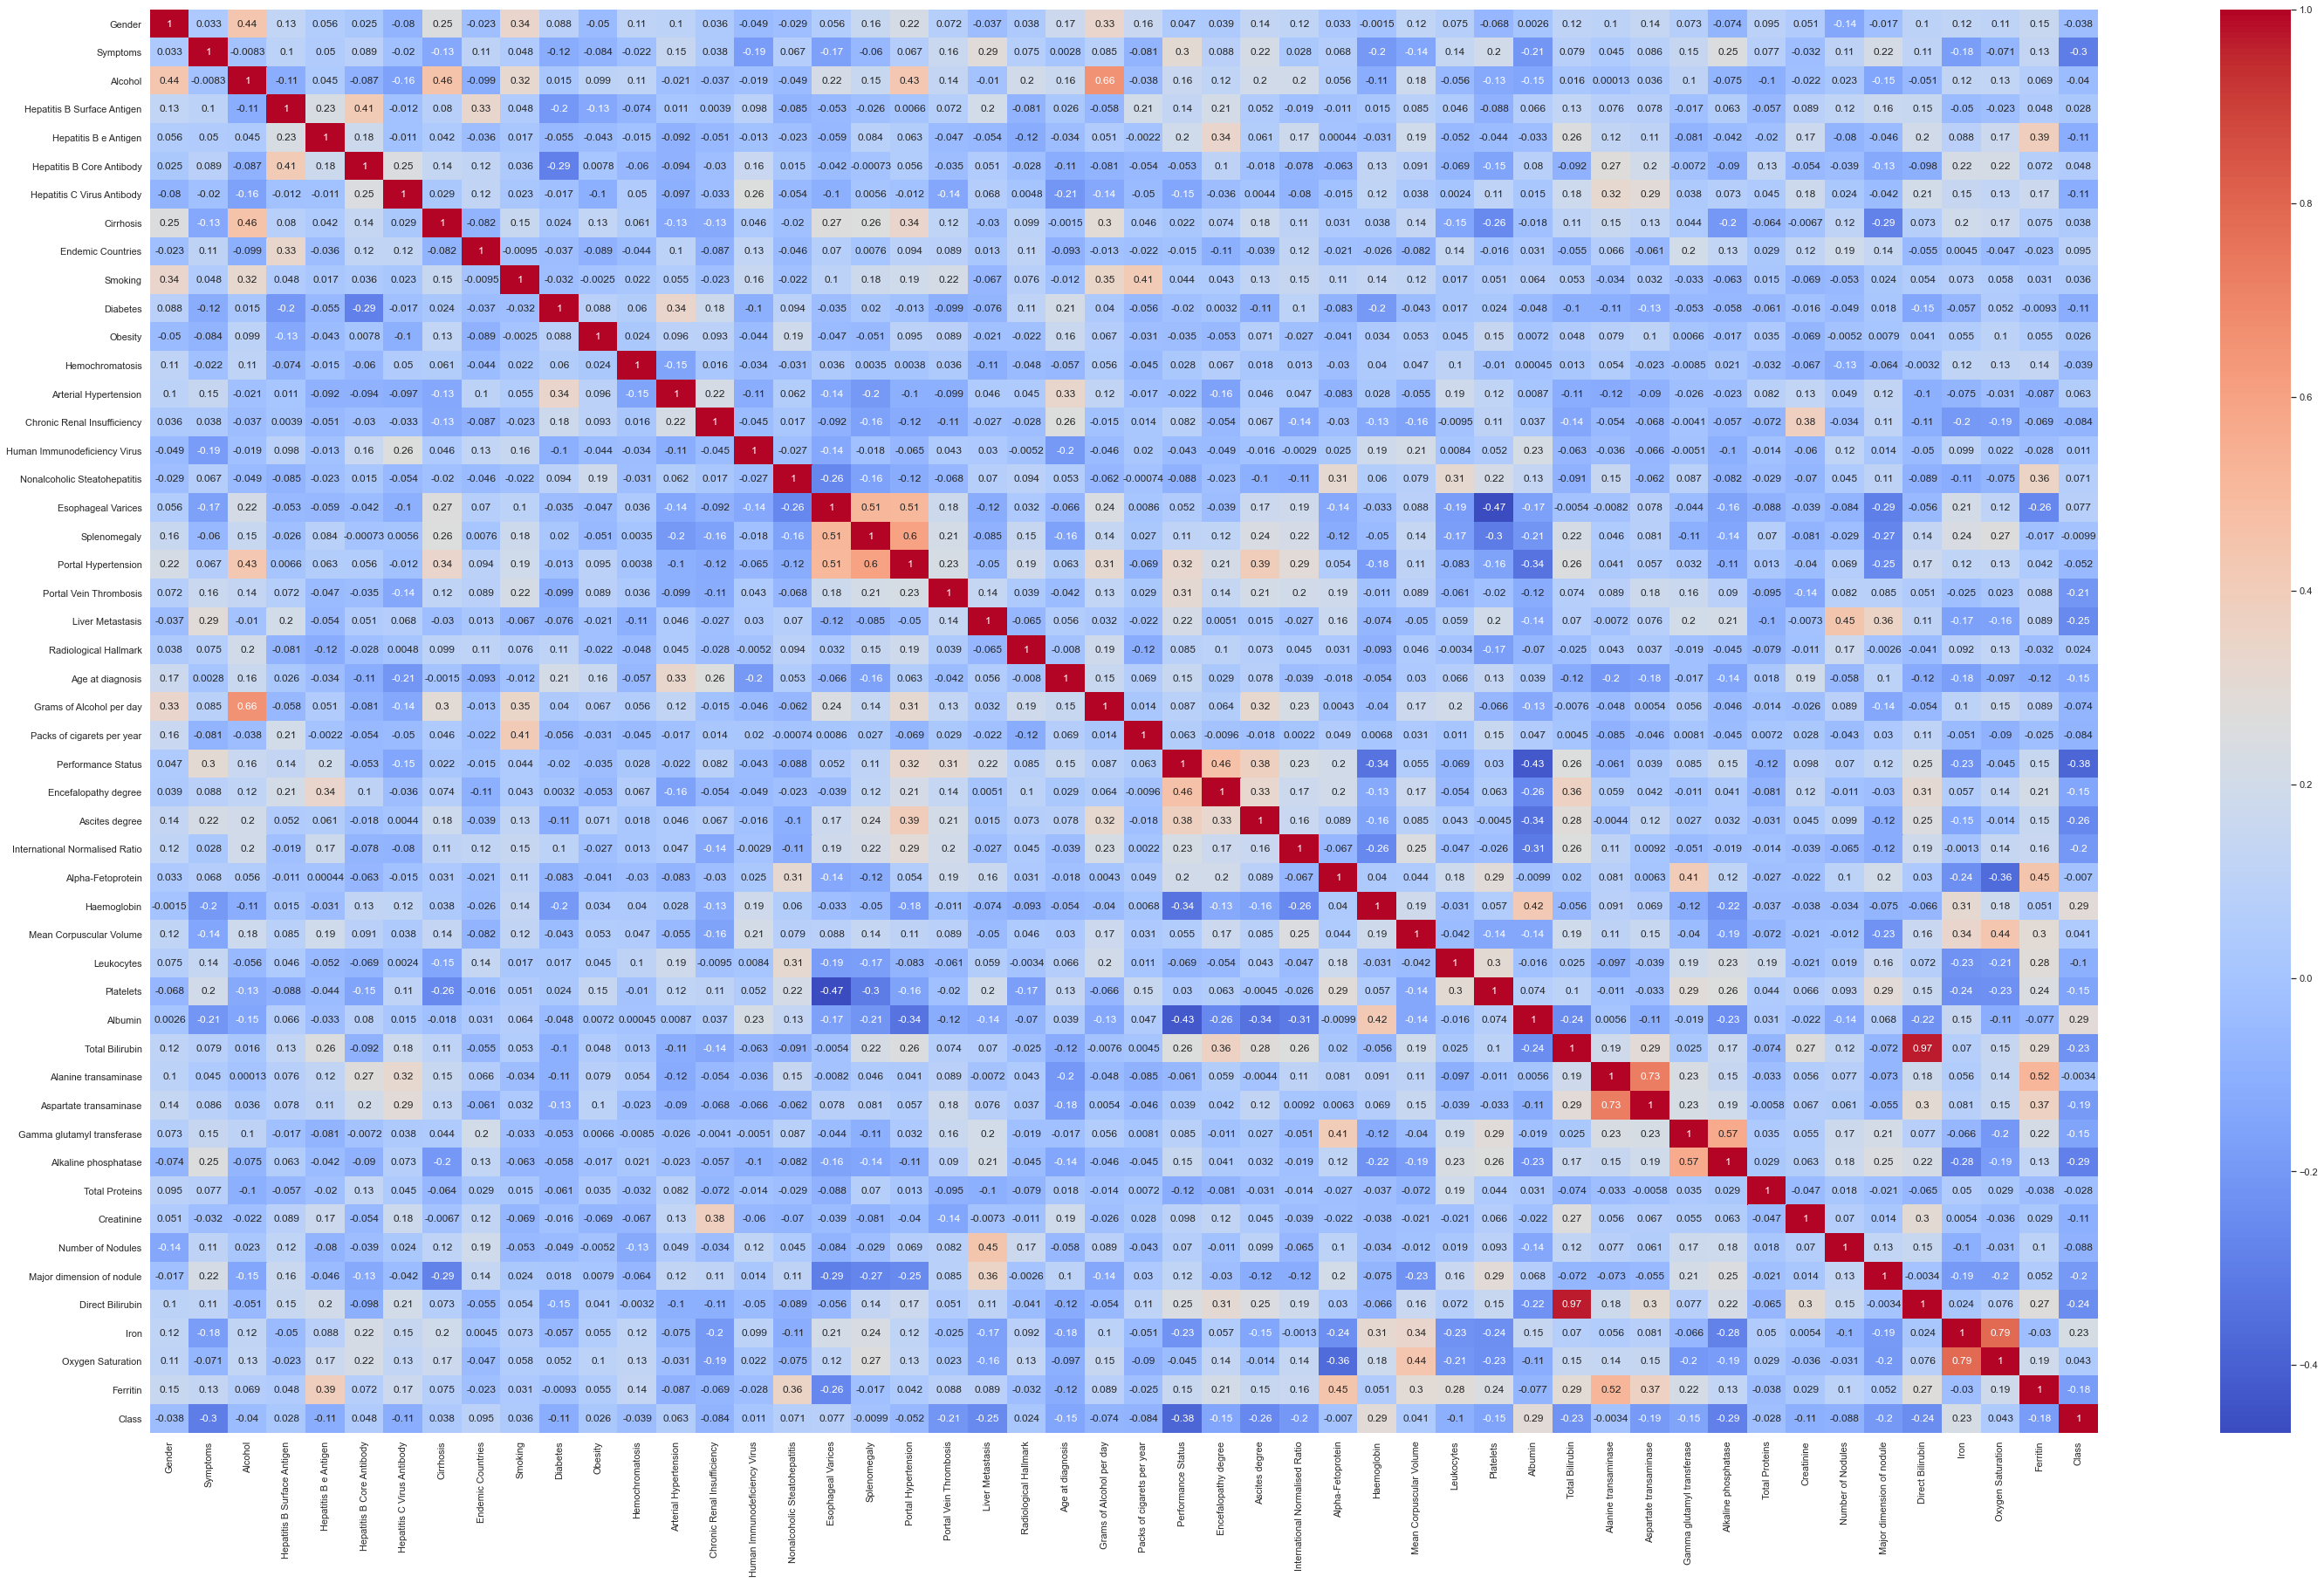

In [16]:
plt.figure(figsize=(50,30))
sns.heatmap(iterative.corr(),cmap='coolwarm',annot=True);

## Is there any data that needs to be encoded?

In [35]:
for i in iterative.columns:
    a = pd.DataFrame(iterative[i].value_counts())
    print(a)

     Gender
1.0     133
0.0      32
          Symptoms
1.000000        94
0.000000        53
0.664359         1
0.499410         1
0.605399         1
0.581148         1
0.513788         1
0.587818         1
0.568453         1
0.509095         1
0.528787         1
0.453017         1
0.525784         1
0.623324         1
0.493506         1
0.480216         1
0.524548         1
0.591118         1
0.548845         1
0.546070         1
     Alcohol
1.0      122
0.0       43
           Hepatitis B Surface Antigen
 0.000000                          132
 1.000000                           16
 0.145600                            1
 0.082680                            1
 0.037015                            1
 0.156728                            1
 0.122751                            1
 0.148856                            1
 0.047677                            1
 0.105196                            1
 0.084486                            1
 0.017744                            1
 0.251981          

__Answer__: When we get rid of missing values, the columns that should be encoded should be the ones with only two unique values: Gender, Alcohol, Cirrhosis, Class

## What proportion of the population dies?

In [6]:
hcc['Class'].value_counts(normalize=True) # 1 = survived and 0 = dead

1    0.618182
0    0.381818
Name: Class, dtype: float64

__Answer__: About $38\%$ of the population dies

/Users/ihoney/.pyenv/versions/3.7.8/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


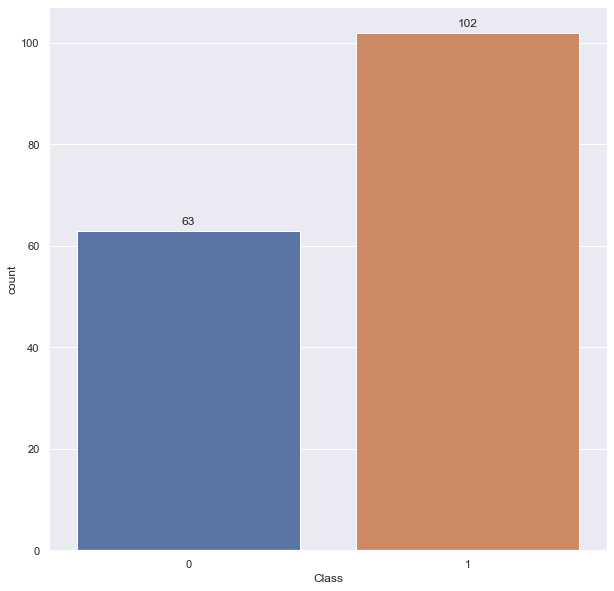

In [34]:
plt.figure(figsize=(10, 10))
_ = sns.countplot('Class', data=hcc)
for p in _.patches:
    _.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Export datasets for modelling

In [20]:
mean.to_csv('../data/raw/mean.csv')
median.to_csv('../data/raw/median.csv')
mode.to_csv('../data/raw/mode.csv')
iterative.to_csv('../data/raw/iterative.csv') 